<a href="https://colab.research.google.com/github/Mildredkulei7/Moringa_core_IP_2/blob/main/Edited_Moringa_Data_Science_Core_W2_Independent_Project_2021_06_Mildred_Kulei_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

In order to work on the above problem, you need to do the following:

1. Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
2. Find and deal with outliers, anomalies, and missing data within the dataset.
3. Perform univariate, bivariate and multivariate analysis recording your observations.
4. Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
5. Challenge your solution by providing insights on how you can make improvements.

# Descriptive Statistics- Assessment

## 1. Defining the Question

 a) Specifying the Data Analytic Question

Predict which individuals are most likely to have or use a bank account while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

 b) Defining the Metric for Success

1. Have all required libraries installed.
2. Check the quality of data
3. the data should reflect a sample of the population.


c) Understanding the context 

 Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.
 
 The goal is to determine which factors most contribute to owning bank account.

d) Recording the Experimental Design


1. Defining the question
2. Reading the data
3. Checking the data
4. Data cleaning
5. Exploratory data analysis(Univeriate, Bivariate and Multivariate)
6. Creating visualization
7. Conclusion
8. Recomendation

e) Data Relevance

The data relevance will be discussed fro d(6) to d(8), after the analysis is complete.


## 2. Reading the Data

In [1]:
# Loading the Data from the source i.e. csv
# ---
# Dataset url = http://bit.ly/FinancialDataset 
# ---
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

variable_df= pd.read_csv('/content/VariableDefinitions.csv')
variable_df

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [2]:
financial_df= pd.read_csv('http://bit.ly/FinancialDataset ')
financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
#
financial_df.shape

(23524, 13)

There are 23,524 number of records.

In [4]:
# Previewing the top of our dataset
#
financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Previewing the bottom of our dataset
#
financial_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [6]:
# Checking whether each column has an appropriate datatype
#
financial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [7]:
financial_df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [8]:
financial_df.describe(include='all')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_421,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [9]:
#renaming the coluns to mach the variable definition dataset
financial_df.columns =['country', 'year', 'uniqueid', 'has_bank_account', 'location_type', 'cellphone_access', 
                       'household_size', 'age_of_respondent', 'gender_of_respondent', 'relationship_with_head',
                       'marital_status', 'education_level', 'job_type'] 
financial_df.head()
              

,country,year,uniqueid,has_bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [10]:
#checking for duplicates

financial_df.duplicated().sum()

0

In [11]:
#checking for null

financial_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
has_bank_account          36
location_type             15
cellphone_access          11
household_size            28
age_of_respondent         34
gender_of_respondent      34
relationship_with_head     4
marital_status            32
education_level           29
job_type                  30
dtype: int64

In [12]:
#previewing null values

nulls = financial_df[financial_df.isnull().any(axis=1)]
nulls

,country,year,uniqueid,has_bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
436,Kenya,2018,uniqueid_437,No,Rural,Yes,2.0,NaN,NaN,Head of Household,Widowed,Primary education,Farming and Fishing
437,Kenya,2018,uniqueid_438,No,Rural,Yes,1.0,NaN,NaN,Head of Household,Married/Living together,Primary education,Farming and Fishing
438,Kenya,2018,uniqueid_439,Yes,Urban,Yes,2.0,NaN,NaN,Head of Household,Married/Living together,Primary education,Formally employed Government
439,Kenya,2018,uniqueid_440,No,Rural,Yes,10.0,NaN,NaN,Spouse,Married/Living together,Primary education,Farming and Fishing
7281,Rwanda,2016,uniqueid_1214,No,Rural,Yes,4.0,NaN,Male,Head of Household,Married/Living together,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23514,Uganda,2018,uniqueid_2107,No,Urban,Yes,NaN,24.0,Female,Spouse,Married/Living together,Primary education,Self employed
23515,Uganda,2018,uniqueid_2108,No,Rural,No,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23516,Uganda,2018,uniqueid_2109,No,Urban,Yes,NaN,35.0,Male,Head of Household,Married/Living together,Primary education,Self employed
23517,Uganda,2018,uniqueid_2110,No,Urban,Yes,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income


In [13]:
#checking the number of years present in the dataset.
financial_df.year.unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

## 4. External Data Source Validation

### a.Validation

There are some few errors that will need to be acted upon like the years captured in the dataset, otherwise according to the external data source from Financal Sector Deepening(FSD), the dataset is valid.

## 5. Data Cleaning

In [14]:
#checking nember of records inour dataset

print('The number of rows are ' + str(financial_df.shape[0]) + ' and columns are ' + str(financial_df.shape[1]))


The number of rows are 23524 and columns are 13


In [15]:
nulls_percantage= (181/23524)*100
nulls_percantage

#the nulls are a small percantage of the whole data, soit is safe to do away with them.

0.7694269682026866

In [16]:
#removing the nulls

financial_no_null = financial_df.dropna(axis=0)
financial_no_null.shape

(23343, 13)

## 6. Exploratory Analysis

### 1. Univariate Analysis

#### A) Numerical

In [17]:
financial_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23343 non-null  object 
 1   year                    23343 non-null  int64  
 2   uniqueid                23343 non-null  object 
 3   has_bank_account        23343 non-null  object 
 4   location_type           23343 non-null  object 
 5   cellphone_access        23343 non-null  object 
 6   household_size          23343 non-null  float64
 7   age_of_respondent       23343 non-null  float64
 8   gender_of_respondent    23343 non-null  object 
 9   relationship_with_head  23343 non-null  object 
 10  marital_status          23343 non-null  object 
 11  education_level         23343 non-null  object 
 12  job_type                23343 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


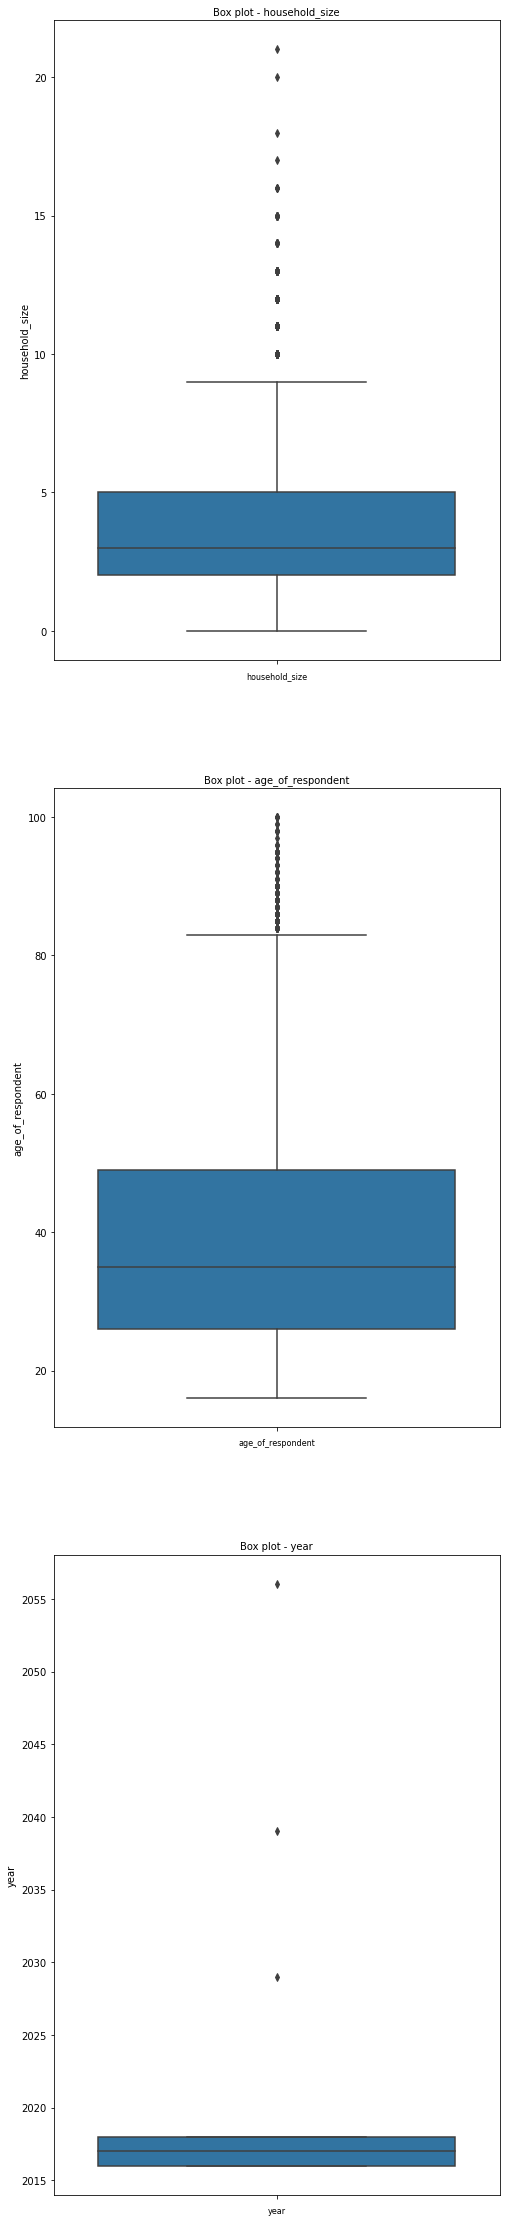

In [18]:
col_names =['household_size','age_of_respondent', 'year']

fig, ax= plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y= financial_no_null[col_val], ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10 )
  ax[i].set_xlabel(col_val, fontsize=8)
plt.show()


In [19]:
#preview year outlier
financial_no_null[financial_no_null.year> 2018]

,country,year,uniqueid,has_bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
213,Kenya,2029,uniqueid_214,No,Urban,Yes,6.0,16.0,Male,Other relative,Single/Never Married,Secondary education,Remittance Dependent
308,Kenya,2056,uniqueid_309,Yes,Urban,Yes,4.0,40.0,Male,Head of Household,Married/Living together,Tertiary education,Formally employed Private
7014,Rwanda,2039,uniqueid_947,No,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Primary education,Informally employed


In [20]:
#there cant be data for year after 2018 as in the context it was clearly stated that the dataset was froma survey done from the year 2016 to 2018.
#we will remove the three rows shown above

financial_no_null= financial_no_null[financial_no_null.year<2019]
financial_no_null[financial_no_null.year>2018]

,country,year,uniqueid,has_bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type


In [21]:
#checking for anormalies
q1_household_size = financial_no_null['household_size'].quantile(.25)
q3_household_size = financial_no_null['household_size'].quantile(.75)

iqr_household_size = q3_household_size - q1_household_size

print('IQR households ' + str(iqr_household_size))


q1_age_of_respondent = financial_no_null['age_of_respondent'].quantile(.25)
q3_age_of_respondent = financial_no_null['age_of_respondent'].quantile(.75)

iqr_age_of_respondent = q3_age_of_respondent - q1_age_of_respondent

print('IQR age of respondent ' + str(iqr_age_of_respondent))

lowerbound_household_size = q1_household_size - (1.5 *iqr_household_size)
upperbound_household_size = q3_household_size + (1.5 *iqr_household_size)

print('lowerbound_household_size ' + str(lowerbound_household_size))
print('upperbound_household_size ' + str(upperbound_household_size))

lowerbound_age_of_respondent = q1_age_of_respondent - (1.5 *iqr_age_of_respondent)
upperbound_age_of_respondent = q3_age_of_respondent + (1.5 *iqr_age_of_respondent)

print('lowerbound_age_of_respondent ' + str(lowerbound_age_of_respondent))
print('upperbound_age_of_respondent ' + str(upperbound_age_of_respondent))

IQR households 3.0
IQR age of respondent 23.0
lowerbound_household_size -2.5
upperbound_household_size 9.5
lowerbound_age_of_respondent -8.5
upperbound_age_of_respondent 83.5


In [22]:
#dealing with outliers and anomalies

financial_no_null = financial_no_null[financial_no_null.household_size<=upperbound_household_size]
financial_no_null

,country,year,uniqueid,has_bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23512,Uganda,2018,uniqueid_2102,No,Rural,No,2.0,57.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income


In [23]:
financial_no_null = financial_no_null[financial_no_null.age_of_respondent<=upperbound_age_of_respondent]
financial_no_null

#the lowerbound values were removed as it had negative values.

,country,year,uniqueid,has_bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23512,Uganda,2018,uniqueid_2102,No,Rural,No,2.0,57.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income


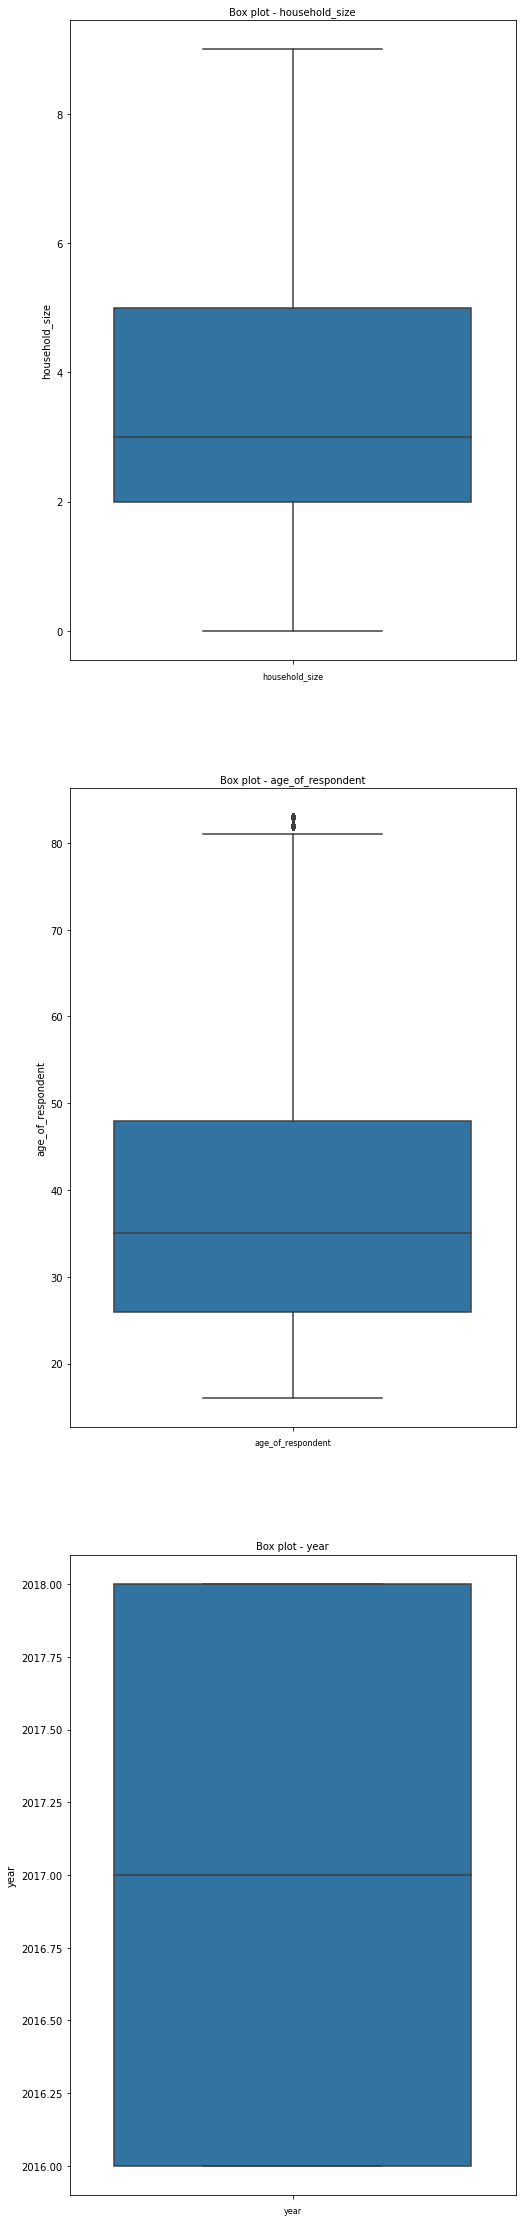

In [24]:
#confirming if the outliers where removed
col_names =['household_size','age_of_respondent', 'year']

fig, ax= plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y= financial_no_null[col_val], ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10 )
  ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

#### B) Categorical

Text(0.5, 1.0, 'East African countries record')

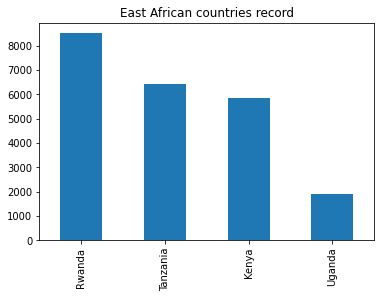

In [25]:
financial_no_null['country'].value_counts().plot.bar()
plt.title('East African countries record')

Text(0.5, 1.0, 'Bank account holders')

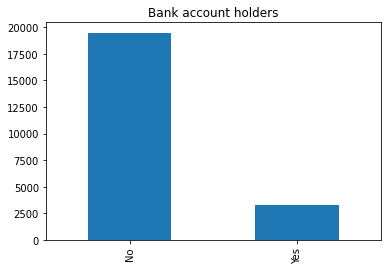

In [26]:
financial_no_null['has_bank_account'].value_counts().plot.bar()
plt.title('Bank account holders')

Text(0.5, 1.0, 'cellphone access')

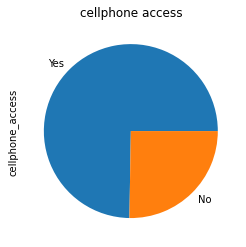

In [27]:
financial_no_null['cellphone_access'].value_counts().plot(kind='pie')
plt.title('cellphone access')

Text(0.5, 1.0, 'Respondent Job type')

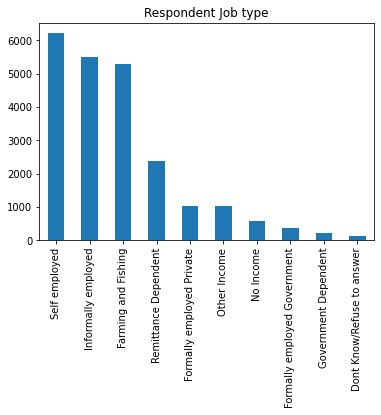

In [28]:
financial_no_null['job_type'].value_counts().plot.bar()
plt.title('Respondent Job type')

Text(0.5, 1.0, 'Education level of the respondent')

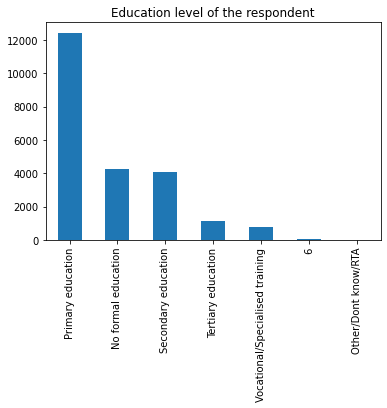

In [29]:
financial_no_null['education_level'].value_counts().plot.bar()
plt.title('Education level of the respondent')

Text(0.5, 1.0, 'Type of location')

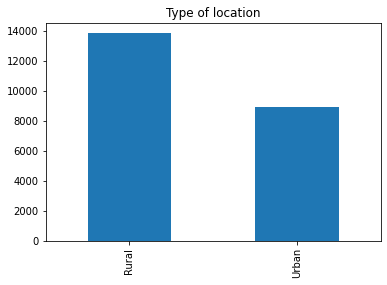

In [30]:
financial_no_null['location_type'].value_counts().plot.bar()
plt.title('Type of location')

Text(0.5, 1.0, 'Relationship with head')

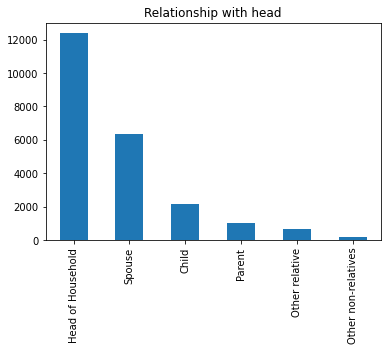

In [31]:
financial_no_null['relationship_with_head'].value_counts().plot.bar()
plt.title('Relationship with head')

Text(0.5, 1.0, 'Size of the household')

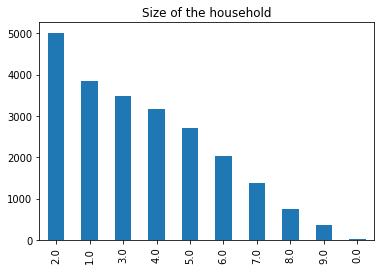

In [32]:
financial_no_null['household_size'].value_counts().plot.bar()
plt.title('Size of the household')

#most household had 2 members

Text(0.5, 1.0, 'Maritalstatus')

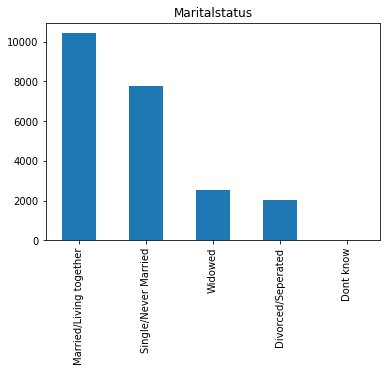

In [33]:
financial_no_null['marital_status'].value_counts().plot.bar()
plt.title('Maritalstatus')

#most respondents where married

#### C) Summary statistics

In [34]:
# Ploting the summaries and recording our observations
#
#sumarry statistics
financial_no_null.describe()

,year,household_size,age_of_respondent
count,22725.000000,22725.000000,22725.000000
mean,2016.968185,3.579846,38.347987
std,0.846366,2.080542,15.806141
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,48.000000
max,2018.000000,9.000000,83.000000


In [35]:
#mode of household size
financial_no_null['household_size'].mode()

0    2.0
dtype: float64

In [36]:
#mode of respondent age
financial_no_null['age_of_respondent'].mode()

0    30.0
dtype: float64

In [37]:
#mode of the year
financial_no_null['year'].mode()

0    2016
dtype: int64

The modes of the numeric fields above are unimodal

In [38]:
#range

print('the range of the year is '+ str(financial_no_null['year'].max() - financial_no_null['year'].min()))
print('the range of the Age is '+ str(financial_no_null['age_of_respondent'].max() - financial_no_null['age_of_respondent'].min()))
print('the range of the household is '+ str(financial_no_null['household_size'].max() - financial_no_null['household_size'].min()))

#the range shows that the data collected in three years, there are 68 different ages, and 10 diferent houshold sizes

the range of the year is 2
the range of the Age is 67.0
the range of the household is 9.0


In [39]:
financial_no_null['age_of_respondent'].var()

249.83410140802906

In [40]:
financial_no_null['household_size'].var()

4.328655582684643

In [41]:
financial_no_null['year'].var()

0.7163350476927479

low variance show how mass of the points are centered around and greater the variance the greater the spread.

In [42]:
#skewness of household size
financial_no_null['household_size'].skew()

0.6058745818063943

In [43]:
#skewness of respondent age
financial_no_null['age_of_respondent'].skew()

0.7402138281724044

In [44]:
#skewness of the year
financial_no_null['year'].skew()

0.06035122899784449

The positive values shows that the tail of data is right-skewed

In [45]:
#kurtosis of household size
financial_no_null['household_size'].kurt()

-0.5055780598336774

In [46]:
#kurtosis of respondent age
financial_no_null['age_of_respondent'].kurt()

-0.23749387799691757

In [47]:
#kurtosis of year
financial_no_null['year'].kurt()

-1.6014658084675666

The data has negative kurtosis meaning that the data is light tailed.

####univariate recommendations

Categorical columns like type of employment can be converted to numerical to futher analyse it and get more insight from it.

### 2. Bivariate Analysis

#### A) Numeric

In [49]:
financial_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22725 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 22725 non-null  object 
 1   year                    22725 non-null  int64  
 2   uniqueid                22725 non-null  object 
 3   has_bank_account        22725 non-null  object 
 4   location_type           22725 non-null  object 
 5   cellphone_access        22725 non-null  object 
 6   household_size          22725 non-null  float64
 7   age_of_respondent       22725 non-null  float64
 8   gender_of_respondent    22725 non-null  object 
 9   relationship_with_head  22725 non-null  object 
 10  marital_status          22725 non-null  object 
 11  education_level         22725 non-null  object 
 12  job_type                22725 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.4+ MB


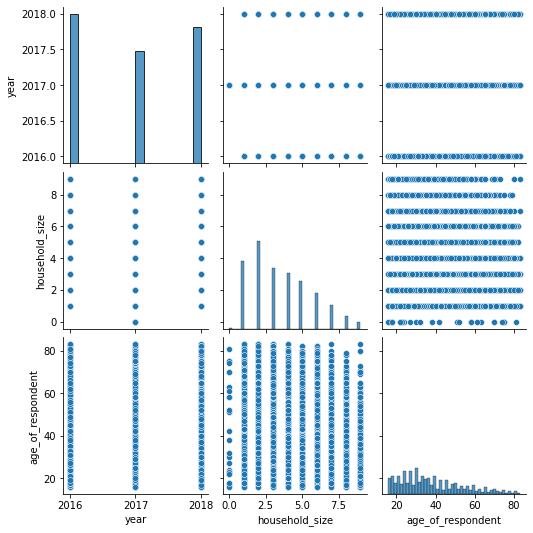

In [50]:
sns.pairplot(financial_no_null)
plt.show()
#this shows that there is no relationship between the numericals

In [51]:
# Calculating the pearson coefficient
pearson_coeff = financial_no_null['household_size'].corr(financial_no_null['age_of_respondent'], method="pearson") 
print(pearson_coeff)

#It shows very week negative correlation, no relationship

-0.10620882169759871


This shows that there is a strong negative Correlation coefficient between household size and age of the respondent. which indicates that the variables move in different directions.

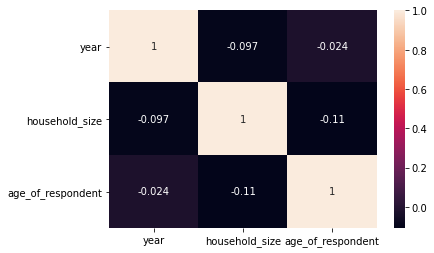

In [52]:
sns.heatmap(financial_no_null.corr(), annot=True)
plt.show()
#it clearly show how the numerical data have no relationship

#### B) Categorical

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


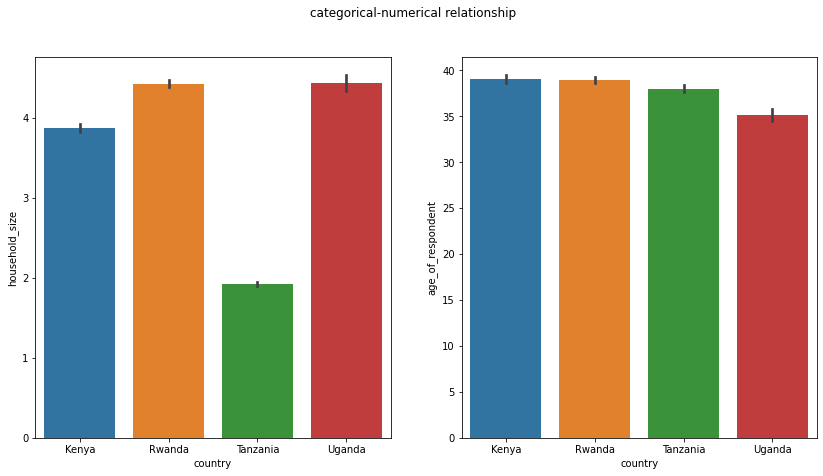

In [53]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(14, 7))
fig.suptitle('categorical-numerical relationship')
sns.barplot(financial_no_null['country'], y= financial_no_null['household_size'], ax=ax1)
sns.barplot(financial_no_null['country'], y= financial_no_null['age_of_respondent'], ax=ax2)
plt.show()

#Rwanda and uganda had highest household size and on the age they were almost the same for the four countries

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


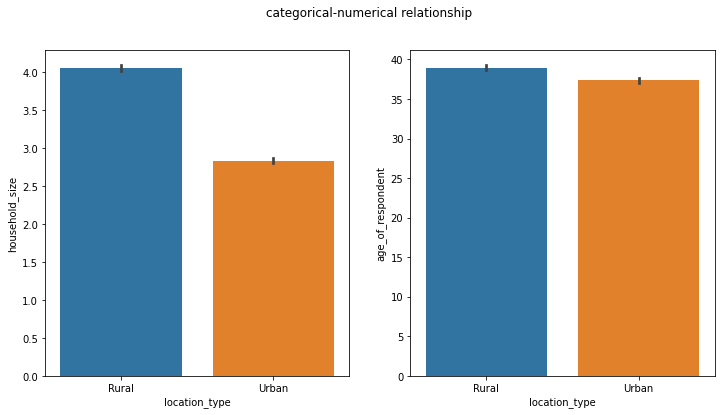

In [54]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(12, 6))
fig.suptitle('categorical-numerical relationship')
sns.barplot(financial_no_null['location_type'], y= financial_no_null['household_size'], ax=ax1)
sns.barplot(financial_no_null['location_type'], y= financial_no_null['age_of_respondent'], ax=ax2)
plt.show()

#household size isbigger in rural compared with urban. Ages of resondents arealmost same on both location types.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


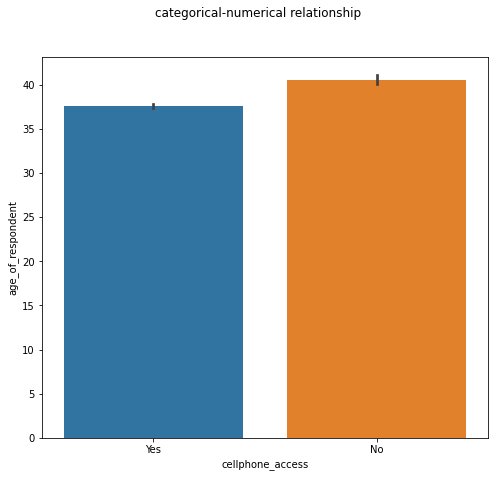

In [55]:
fig, ax = plt.subplots(1,  figsize=(8, 7))
fig.suptitle('categorical-numerical relationship')
sns.barplot(financial_no_null['cellphone_access'], y= financial_no_null['age_of_respondent'], ax=ax)
plt.show()
#avarage age of person with cellphone access is almost similar with persons who dont have access.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


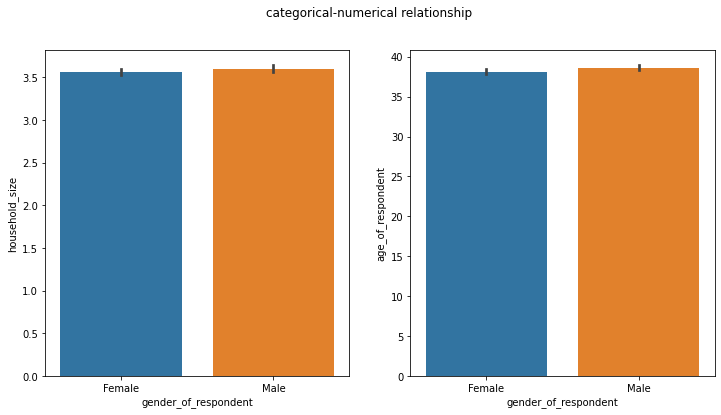

In [56]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(12, 6))
fig.suptitle('categorical-numerical relationship')
sns.barplot(financial_no_null['gender_of_respondent'], y= financial_no_null['household_size'], ax=ax1)
sns.barplot(financial_no_null['gender_of_respondent'], y= financial_no_null['age_of_respondent'], ax=ax2)
plt.show()
#neither household size or age of respondent had major difference when compared with gender.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


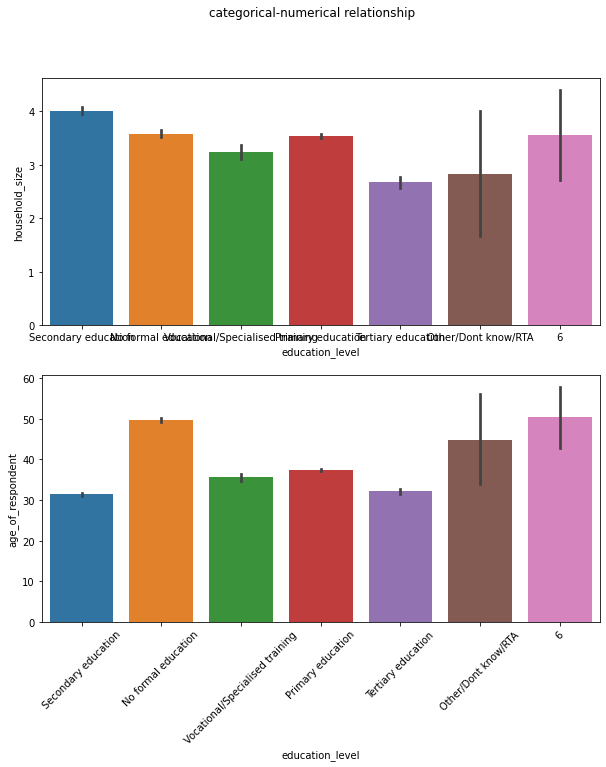

In [91]:
fig, (ax1,ax2) = plt.subplots(2,1,  figsize=(10,10))
plt.xticks(rotation = 45)
fig.suptitle('categorical-numerical relationship')
sns.barplot(financial_no_null['education_level'], y= financial_no_null['household_size'], ax=ax1)
sns.barplot(financial_no_null['education_level'], y= financial_no_null['age_of_respondent'], ax=ax2)
plt.show()
#most households with size 4 had its responded with secondary level of education

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


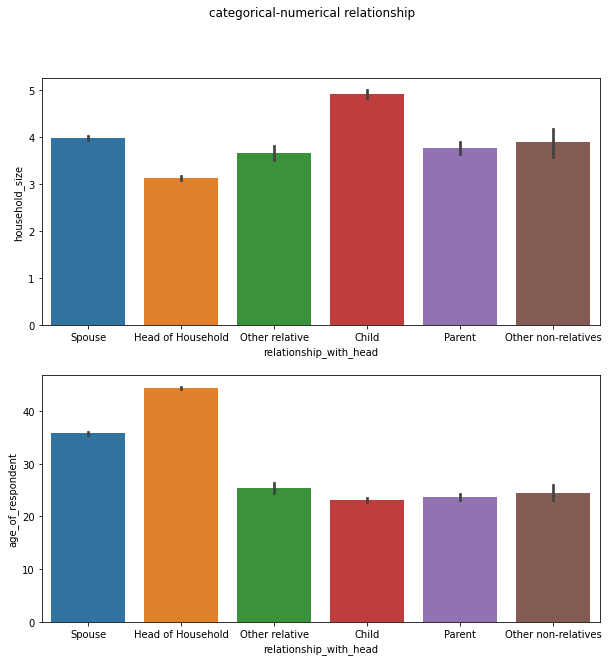

In [89]:
fig, (ax1,ax2) = plt.subplots(2,1,  figsize=(10,10))
fig.suptitle('categorical-numerical relationship')
sns.barplot(financial_no_null['relationship_with_head'], y= financial_no_null['household_size'], ax=ax1)
sns.barplot(financial_no_null['relationship_with_head'], y= financial_no_null['age_of_respondent'], ax=ax2)
plt.show()
#household heads tend to have average age of 45 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


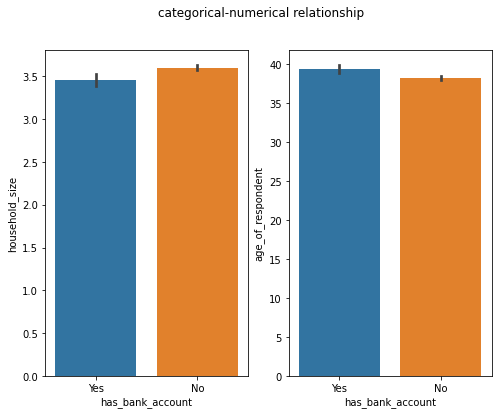

In [59]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(8, 6))
fig.suptitle('categorical-numerical relationship')
sns.barplot(financial_no_null['has_bank_account'], y= financial_no_null['household_size'], ax=ax1)
sns.barplot(financial_no_null['has_bank_account'], y= financial_no_null['age_of_respondent'], ax=ax2)
plt.show()
#neither household size or age of respondent had major difference when compared with having bank account.

In [60]:
financial_no_null['job_type'].value_counts()

Self employed                   6209
Informally employed             5490
Farming and Fishing             5296
Remittance Dependent            2375
Formally employed Private       1035
Other Income                    1026
No Income                        585
Formally employed Government     382
Government Dependent             209
Dont Know/Refuse to answer       118
Name: job_type, dtype: int64

In [61]:
#grouping aages by the type of job
job_type= financial_no_null.groupby(['job_type'], as_index=False)['age_of_respondent'].mean().sort_values(by='age_of_respondent',ascending=False)
job_type

,job_type,age_of_respondent
4,Government Dependent,62.306220
1,Farming and Fishing,43.108761
9,Self employed,38.597842
2,Formally employed Government,38.094241
7,Other Income,37.361598
0,Dont Know/Refuse to answer,37.254237
5,Informally employed,36.090528
8,Remittance Dependent,34.373895
3,Formally employed Private,34.012560
6,No Income,31.143590


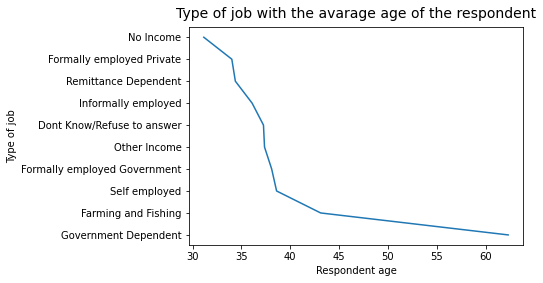

In [62]:
# Plotting a line graph
job= job_type['job_type']
respondent = job_type['age_of_respondent']

plt.plot(respondent, job)
plt.title("Type of job with the avarage age of the respondent", fontsize=14, y=1.015)
plt.ylabel('Type of job')
plt.xlabel('Respondent age')
plt.show()
# we can see that most respondents who are 33 and below  have no income, most respondents who are above 55 are government dependent

#### C) Bivariate analysis recommendation

Tha data '6'in education leveldoes not have a proper meaning, we can only assume that it means level/grade 6.

### 3. Multivariate Analysis

#### Linear Discriminant Analysis(LDA)

In [65]:
financial_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22725 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 22725 non-null  object 
 1   year                    22725 non-null  int64  
 2   uniqueid                22725 non-null  object 
 3   has_bank_account        22725 non-null  object 
 4   location_type           22725 non-null  object 
 5   cellphone_access        22725 non-null  object 
 6   household_size          22725 non-null  float64
 7   age_of_respondent       22725 non-null  float64
 8   gender_of_respondent    22725 non-null  object 
 9   relationship_with_head  22725 non-null  object 
 10  marital_status          22725 non-null  object 
 11  education_level         22725 non-null  object 
 12  job_type                22725 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 3.1+ MB


In [73]:
#data for label encoding

Financial_encode =financial_no_null.copy(deep=True)
Financial_encode['cellphone_access']=Financial_encode['cellphone_access'].astype('category')
Financial_encode['country']=Financial_encode['country'].astype('category')
Financial_encode['education_level']=Financial_encode['education_level'].astype('category')
Financial_encode['gender_of_respondent']=Financial_encode['gender_of_respondent'].astype('category')
Financial_encode['job_type']=Financial_encode['job_type'].astype('category')
Financial_encode['location_type']=Financial_encode['location_type'].astype('category')
Financial_encode['marital_status']=Financial_encode['marital_status'].astype('category')
Financial_encode['relationship_with_head']=Financial_encode['relationship_with_head'].astype('category')
Financial_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22725 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   country                 22725 non-null  category
 1   year                    22725 non-null  int64   
 2   uniqueid                22725 non-null  object  
 3   has_bank_account        22725 non-null  object  
 4   location_type           22725 non-null  category
 5   cellphone_access        22725 non-null  category
 6   household_size          22725 non-null  float64 
 7   age_of_respondent       22725 non-null  float64 
 8   gender_of_respondent    22725 non-null  category
 9   relationship_with_head  22725 non-null  category
 10  marital_status          22725 non-null  category
 11  education_level         22725 non-null  category
 12  job_type                22725 non-null  category
dtypes: category(8), float64(2), int64(1), object(2)
memory usage: 1.8+ MB


In [75]:
#label encoding the categorical data
from sklearn.preprocessing import LabelEncoder

LabelEncoder =LabelEncoder()

Financial_encode['cellphone_access']=LabelEncoder.fit_transform(Financial_encode['cellphone_access'])
Financial_encode['country']=LabelEncoder.fit_transform(Financial_encode['country'])
Financial_encode['education_level']=LabelEncoder.fit_transform(Financial_encode['education_level'])
Financial_encode['gender_of_respondent']=LabelEncoder.fit_transform(Financial_encode['gender_of_respondent'])
Financial_encode['job_type']=LabelEncoder.fit_transform(Financial_encode['job_type'])
Financial_encode['location_type']=LabelEncoder.fit_transform(Financial_encode['location_type'])
Financial_encode['marital_status']=LabelEncoder.fit_transform(Financial_encode['marital_status'])
Financial_encode['relationship_with_head']=LabelEncoder.fit_transform(Financial_encode['relationship_with_head'])
Financial_encode.head()

,country,year,uniqueid,has_bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,uniqueid_1,Yes,0,1,3.0,24.0,0,5,2,4,9
1,0,2018,uniqueid_2,No,0,0,5.0,70.0,0,1,4,1,4
2,0,2018,uniqueid_3,Yes,1,1,5.0,26.0,1,3,3,6,9
3,0,2018,uniqueid_4,No,0,1,5.0,34.0,0,1,2,3,3
4,0,2018,uniqueid_5,No,1,0,8.0,26.0,1,0,3,3,5


In [76]:
#separating target label; 'has bank account' from other features
feature = Financial_encode.drop(['has_bank_account', 'uniqueid', 'year', 'country'], 1)
bank_label = Financial_encode['has_bank_account']

feature

,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,1,3.0,24.0,0,5,2,4,9
1,0,0,5.0,70.0,0,1,4,1,4
2,1,1,5.0,26.0,1,3,3,6,9
3,0,1,5.0,34.0,0,1,2,3,3
4,1,0,8.0,26.0,1,0,3,3,5
...,...,...,...,...,...,...,...,...,...
23512,0,0,2.0,57.0,0,1,0,1,7
23519,0,1,4.0,48.0,0,1,0,1,7
23520,0,1,2.0,27.0,0,1,3,4,7
23521,0,1,5.0,27.0,0,4,4,3,7


In [77]:
#performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda= LDA()

lda_ = lda.fit(feature, bank_label)
lda_feat = lda_.transform(feature)

#Display the coefficient of reducted columns
lda_.coef_

array([[ 0.66215146,  1.03187239, -0.01278889,  0.03065278,  0.35007571,
        -0.02258319, -0.06482561,  0.9183589 , -0.08536203]])

In [83]:
#create a dataframe so that we can extract the names of columns
f_df = pd.DataFrame(index=feature.columns.values, data=lda_.coef_[0].T)
f_df.sort_values(0, ascending=False)

,0
cellphone_access,1.031872
education_level,0.918359
location_type,0.662151
gender_of_respondent,0.350076
age_of_respondent,0.030653
household_size,-0.012789
relationship_with_head,-0.022583
marital_status,-0.064826
job_type,-0.085362


The following features has great effect on the dataset
* cell phone access
* Education level
* Location type
* Gender of respondent
* Age of the respondent

## 7. Implementing the Solution

In [80]:
Bank_account= financial_no_null[financial_no_null.has_bank_account=='Yes']
Bank_account.head()

,country,year,uniqueid,has_bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
11,Kenya,2018,uniqueid_12,Yes,Rural,Yes,3.0,69.0,Male,Head of Household,Married/Living together,Secondary education,Other Income
17,Kenya,2018,uniqueid_18,Yes,Rural,Yes,6.0,27.0,Female,Head of Household,Married/Living together,Secondary education,Self employed


In [82]:
Bank_account.country.value_counts()
#kenya has highest number of bank account holders

Kenya       1491
Rwanda       980
Tanzania     598
Uganda       166
Name: country, dtype: int64

In [87]:
Bank_account.gender_of_respondent.value_counts()
# male gender are more likely tohave bank accounts

Male      1782
Female    1453
Name: gender_of_respondent, dtype: int64

In [88]:
Bank_account.cellphone_access.value_counts()
#persons with cell phone access are more likely to have a bank account

Yes    3142
No       93
Name: cellphone_access, dtype: int64

In [84]:
Bank_account.location_type.value_counts()
#there is no much difference in type of location for account holders.

Urban    1620
Rural    1615
Name: location_type, dtype: int64

In [86]:
Bank_account.education_level.value_counts()
#persons with some form of education are likely to have a bank account

Primary education                  1061
Secondary education                 968
Tertiary education                  584
Vocational/Specialised training     450
No formal education                 161
Other/Dont know/RTA                   6
6                                     5
Name: education_level, dtype: int64

In [85]:
Bank_account.age_of_respondent.value_counts()
#most people above the age of 28 have bank accounts 

30.0    175
35.0    134
28.0    125
32.0    125
40.0    122
       ... 
77.0      6
16.0      5
82.0      5
81.0      3
83.0      2
Name: age_of_respondent, Length: 68, dtype: int64

## 8. Challenging the solution

The solution might be bias, since there might be other form of informal banking techniques used by the sampled population that the collected data overlooked, these are things like table banking and chamas which do not need the use and access of banking accounts.

## 9. Recommendation

From our analysis we can conclude that we can comfortably use a combination of the following features to predict if an individual has  a bank account.


*   Cell phone access

*   Level of education

*   Type of location
*   Gender of respondent


*   Age of respondent